In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('test_1.csv') #read the csv data

In [5]:
df.head()

,A,B,C,D,E,F,G
0,21.6,292.0,65,3,22.19,24.51,29.06
1,36.0,122.4,65,3,9.31,10.29,12.20
2,36.0,187.2,65,3,14.24,15.73,18.65
3,36.0,252.0,65,3,19.18,21.18,25.11
4,36.0,374.4,65,3,37.31,31.46,37.31


In [6]:
df.shape #it's describe the shape of the data


(300, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       300 non-null    float64
 1   B       300 non-null    float64
 2   C       300 non-null    int64  
 3   D       300 non-null    int64  
 4   E       300 non-null    float64
 5   F       300 non-null    float64
 6   G       300 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 16.5 KB


In [9]:
X=df['E'].values   #collecting the x and y values

In [10]:
Y=df['G'].values

In [11]:
#mean of X and Y

mean_x=np.mean(X)
mean_y=np.mean(Y)

In [12]:
n=len(X)

In [13]:
# using formula to calculate b1 and b2

numer=0
denom=0
for i in range(n):
    numer +=(X[i]-mean_x)*(Y[i]-mean_y)
    denom +=(X[i]-mean_x)**2
    
b1=numer/denom
b0=mean_y-(b1*mean_x)
print(b1,b0)

1.286928253214126 -0.6282510188802917


In [14]:
pd.isnull(df)

,A,B,C,D,E,F,G
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
295,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False
298,False,False,False,False,False,False,False


In [15]:
max_x=np.max(X)+100

In [16]:
min_x=np.min(X)-100

In [17]:
x=np.linspace(min_x,max_x,1000)
y=b0+b1*x

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

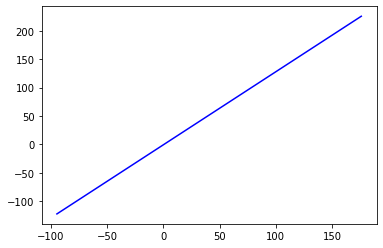

In [20]:
plt.plot(x,y,color='blue',label='Regression Line')

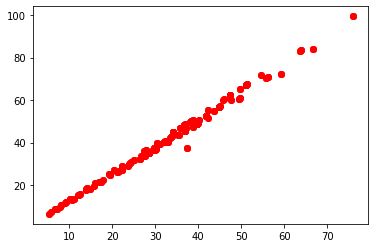

In [21]:
plt.scatter(X,Y,c='red',label='scatter plot')

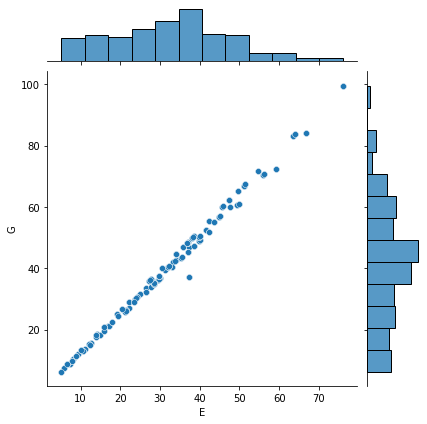

In [37]:
sns.jointplot(x='E',y='G',data=df)

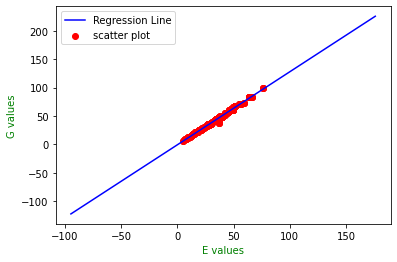

In [24]:
plt.plot(x,y,color='blue',label='Regression Line')
plt.scatter(X,Y,c='red',label='scatter plot')
plt.xlabel('E values',color='green')
plt.ylabel('G values',color='green')
plt.legend()
plt.show()

In [25]:
ss_t=0
ss_r=0

In [26]:
for i in range(n):
    y_pred=b0+b1*X[i]
    ss_t +=(Y[i]-mean_y)**2
    ss_r +=(Y[i]-y_pred)**2
    
r2=1-(ss_r/ss_t)
print(r2)

0.9931337498154401


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
X=X.reshape((n,1))

In [30]:
reg=LinearRegression()

In [31]:
reg=reg.fit(X,Y)

In [32]:
Y_pred=reg.predict(X)

In [33]:
r2_score=reg.score(X,Y)
print(r2_score)

0.9931337498154401
